In [24]:

import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing

# prepare train data
train = pd.read_csv('data/train_data_cut.csv', sep=',', encoding='utf8')
c_train = train.drop(['ID_code'], axis=1)
c_train = c_train.drop(['target'], axis=1)
x_train = c_train.values

#scaler = preprocessing.MinMaxScaler().fit(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

# on non-standardized data
pca = PCA(n_components=2).fit(x_train)
x_train_pca = pca.transform(x_train)

pca1 = PCA(n_components=2).fit(x_train_scaled)
x_train_scaled_pca = pca1.transform(x_train_scaled)

In [25]:
x = pd.DataFrame(x_train_pca)
x['target'] = train['target']

x1= pd.DataFrame(x_train_scaled_pca)
x1['target'] = train['target']


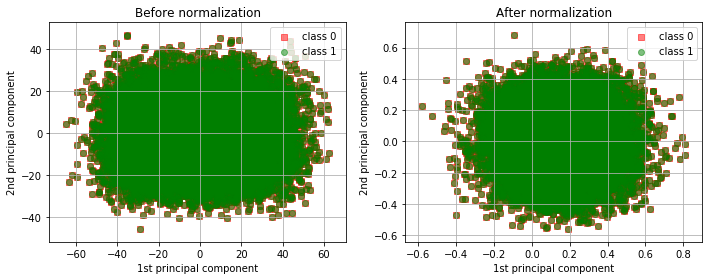

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(0,2), ('red', 'green'), ('s', 'o')):
    ax1.scatter(x[x['target']==1][0], x[x['target']==1][1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(0,2), ('red', 'green'), ('s', 'o')):
    ax2.scatter(x1[x1['target']==1][0], x1[x1['target']==1][1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Before normalization')    
ax2.set_title('After normalization')    

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  

